Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


In [1]:
from __future__ import print_function
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [3]:

mnist=tf.keras.datasets.mnist
# m=mnist.load_data()
# print(m[0][0].shape,m[0][1].shape,m[1][0].shape,m[1][1].shape)

# cf) tensorflow_datasets 패키지 :  https://datascienceschool.net/view-notebook/cd2216fe352c4346bc1e5bb5efa9927e/


11501568/11490434 [==============================] - 0s 0us/step


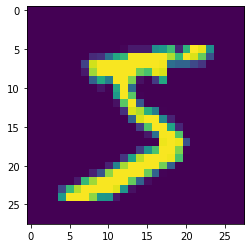

In [4]:
%matplotlib inline
from matplotlib.pyplot import imread,imshow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img=x_train[0]
imshow(img)

In [5]:
y_train[0]

5

In [6]:
# # the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train


# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

60000 train samples
10000 test samples


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.2455 - accuracy: 0.9241 - val_loss: 0.1074 - val_accuracy: 0.9654
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1033 - accuracy: 0.9696 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0691 - val_accuracy: 0.9788
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0851 - val_accuracy: 0.9747
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0789 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0676 - val_accuracy: 0.9836
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9886 - val_loss: 0.0761 - val_accuracy: 0.9814
Epoch 

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12356603890657425
Test accuracy: 0.9828000068664551
